# Projekt Big Data
## Temat: Analizy w Formula 1

### Ilość wyścigów na przestrzeni lat


In [55]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import requests

In [56]:
racesUrl = "http://ergast.com/api/f1.json"  # website api url
racesResponse = requests.get(racesUrl)
racesJson = json.loads(racesResponse.text)
races = pd.DataFrame.from_dict(racesJson["MRData"]["RaceTable"]["Races"])
totalRaces = int(racesJson["MRData"]["total"])
limitRaces = 100
offsetRaces = 0
races = pd.DataFrame()

In [57]:
while offsetRaces < totalRaces:
    dataset = racesUrl + "?limit=" + str(limitRaces) + "&offset=" + str(offsetRaces)
    offsetRaces = offsetRaces + 100
    subset = pd.DataFrame.from_dict(json.loads(requests.get(dataset).text)["MRData"]["RaceTable"]["Races"])
    frames = [races, subset]
    races = pd.concat(frames)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

      number of races
1950                7
1951                8
1952                8
1953                9
1954                9
1955                7
1956                8
1957                8
1958               11
1959                9
1960               10
1961                8
1962                9
1963               10
1964               10
1965               10
1966                9
1967               11
1968               12
1969               11
1970               13
1971               11
1972               12
1973               15
1974               15
1975               14
1976               16
1977               17
1978               16
1979               15
1980               14
1981               15
1982               16
1983               15
1984               16
1985               16
1986               16
1987               16
1988               16
1989               16
1990               16
1991               16
1992               16
1993               16
1994      

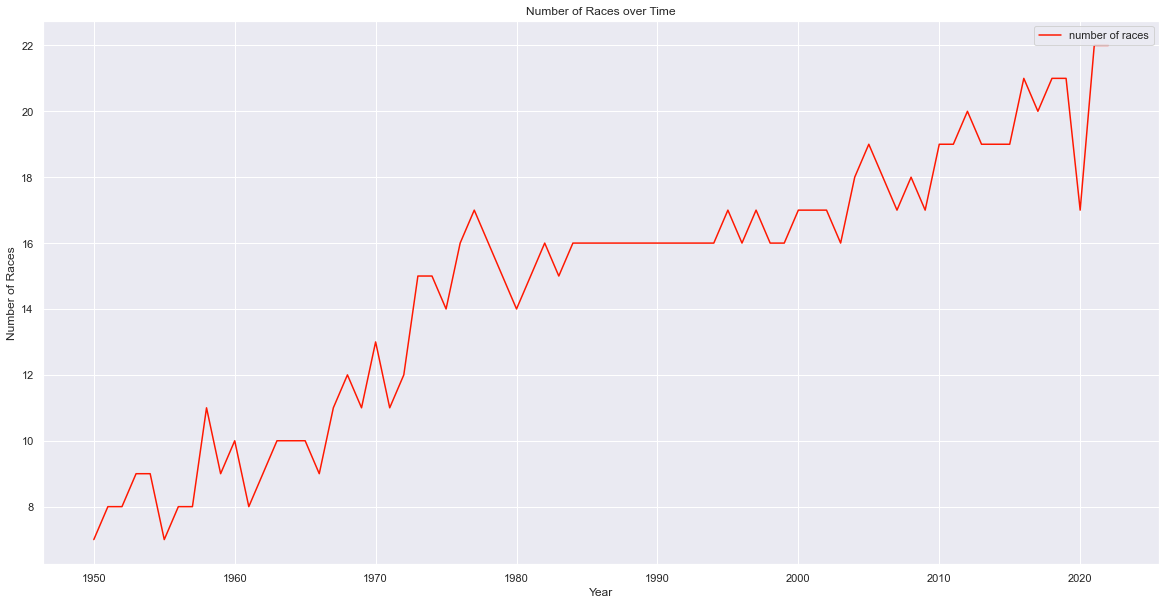

In [58]:
races = races.reset_index()
races = races.drop(columns=["index", "url", "Circuit", "time", "Sprint", "Qualifying"])
year = races['season'].value_counts().sort_index().to_frame()
year.columns = ["number of races"]
f1_color = (255 / 255, 24 / 255, 1 / 255)
ax = year.plot.line(y='number of races', use_index=True, color=f1_color, figsize=(20, 10))
ax.set_xlabel("Year");
ax.set_ylabel("Number of Races");
ax.set_title("Number of Races over Time");
plt.savefig('screens/years.png')
print(year.head(73))
plt.show()
plt.close()
db = year.head(73)

filepath = Path('csv/year.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
db.to_csv(filepath)

### Statusy kierowców z wszystkich wyścigów

In [59]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from pathlib import Path

   count        status
0   6845      Finished
1    143  Disqualified
2   1038      Accident
3    824     Collision
4   2007        Engine
5    801       Gearbox
6    321  Transmission
7    215        Clutch
8    135    Hydraulics
9    315    Electrical
10  3776        +1 Lap
11  1587       +2 Laps
12   731       +3 Laps
13   405       +4 Laps
14   221       +5 Laps
15   152       +6 Laps
16    99       +7 Laps
17    52       +8 Laps
18    38       +9 Laps
19   791      Spun off
20    42      Radiator
21   430    Suspension
22   250        Brakes
23    60  Differential
24   130   Overheating
25    28    Mechanical
26    55          Tyre
27     1   Driver Seat
28    41      Puncture
29    25    Driveshaft


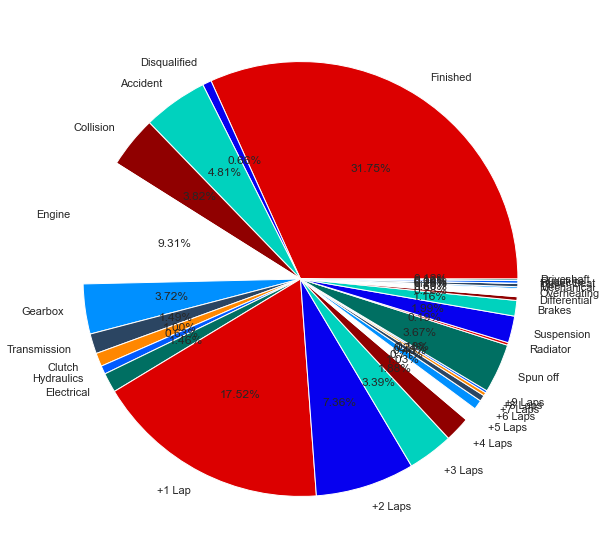

In [60]:
url = 'http://ergast.com/api/f1/status/.json'
statusResponse = requests.get(url)
statusRace = json.loads(statusResponse.text)
races = pd.DataFrame.from_dict(statusRace["MRData"]["StatusTable"])
df = pd.json_normalize(races["Status"])
df = df.drop(columns=["statusId"])
count = df['count'].values
status = df['status'].values

fig = plt.figure(figsize=(30,10))
print(df)
plt.pie(count, labels = status,autopct='%1.2f%%')
plt.savefig('screens/status.png')
plt.show()
filepath = Path('csv/status.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath, index=False)


### Ranking kierowców w sezonie 2022/2023

In [61]:
import matplotlib.pyplot as plt
from pyergast import pyergast
import numpy as np
driversStandings = pyergast.driver_standings(2022)

In [62]:
standings = driversStandings.drop(columns=["constructorID", "constructor", "nationality",  "driverID", "positionText"])
position = standings['position'].value_counts().sort_index().to_frame()
points = standings['points'].values
names = standings['driver'].values
wins = standings['wins'].values
T3 = list(map(int, points))
T2 = list(map(int, wins))

   position points wins            driver
0         1     71    2   Charles Leclerc
1         2     37    0    George Russell
2         3     33    0      Carlos Sainz
3         4     30    0      Sergio Pérez
4         5     28    0    Lewis Hamilton
5         6     25    1    Max Verstappen
6         7     20    0      Esteban Ocon
7         8     16    0      Lando Norris
8         9     12    0   Kevin Magnussen
9        10     12    0   Valtteri Bottas
10       11      8    0  Daniel Ricciardo
11       12      6    0      Pierre Gasly
12       13      4    0      Yuki Tsunoda
13       14      2    0   Fernando Alonso
14       15      1    0       Guanyu Zhou
15       16      1    0   Alexander Albon
16       17      0    0   Mick Schumacher
17       18      0    0      Lance Stroll
18       19      0    0   Nico Hülkenberg
19       20      0    0   Nicholas Latifi
20       21      0    0  Sebastian Vettel


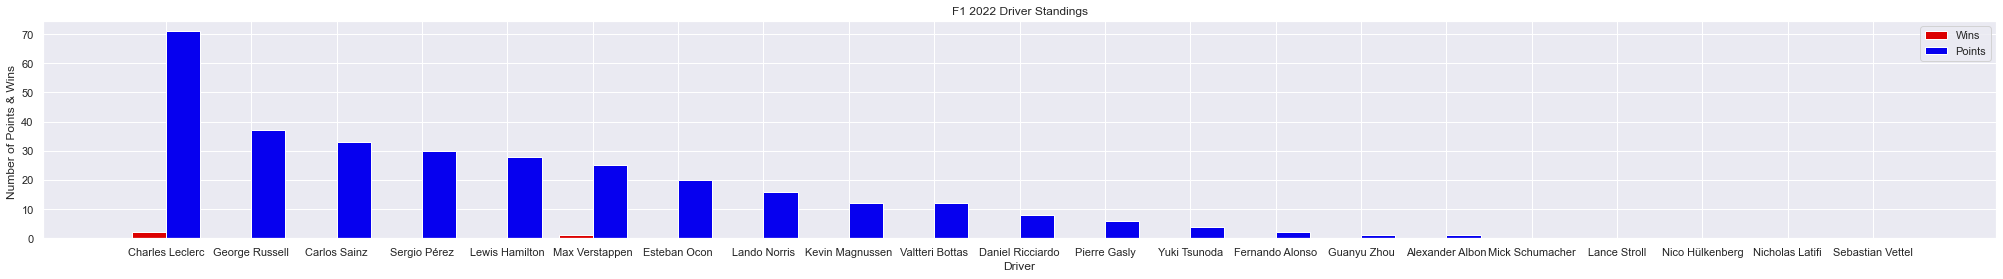

In [63]:
print(standings)
X_axis = np.arange(len(names))
fig = plt.figure(figsize=(35, 4))
plt.bar(X_axis - 0.2, T2, 0.4, label = 'Wins')
plt.bar(X_axis + 0.2, T3, 0.4, label = 'Points')
plt.xticks(X_axis, names)
plt.xlabel("Driver")
plt.ylabel("Number of Points & Wins ")
plt.title("F1 2022 Driver Standings")
plt.legend()
plt.show()



### Ranking konstruktorów w sezonie 2022/2023

In [64]:
import matplotlib.pyplot as plt
from pyergast import pyergast
import numpy as np
constructorStandings = pyergast.constructor_standings(2022)

In [65]:
standings = constructorStandings.drop(columns=["constructorID", "nationality",  "positionText"])
position = standings['position'].value_counts().sort_index().to_frame()
points = standings['points'].values
names = standings['name'].values
wins = standings['wins'].values
T3 = list(map(int, points))
T2 = list(map(int, wins))

  position points wins            name
0        1    104    2         Ferrari
1        2     65    0        Mercedes
2        3     55    1        Red Bull
3        4     24    0         McLaren
4        5     22    0  Alpine F1 Team
5        6     13    0      Alfa Romeo
6        7     12    0    Haas F1 Team
7        8     10    0      AlphaTauri
8        9      1    0        Williams
9       10      0    0    Aston Martin


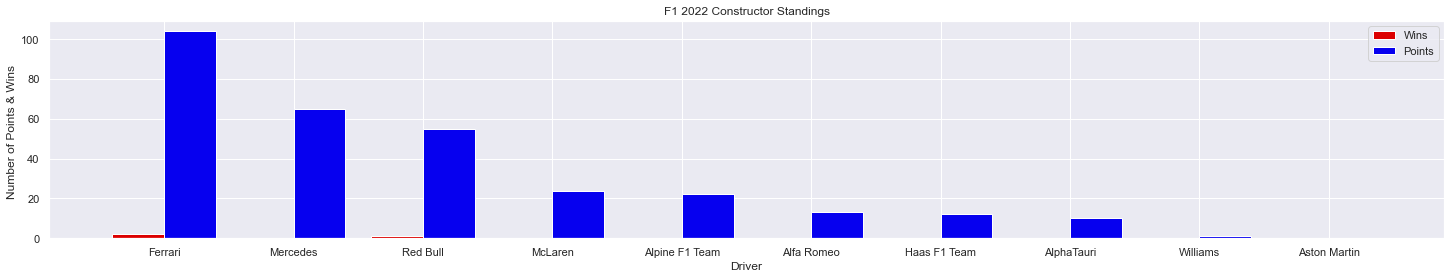

In [66]:
print(standings)
X_axis = np.arange(len(names))
fig = plt.figure(figsize=(25, 4))
plt.bar(X_axis - 0.2, T2, 0.4, label = 'Wins')
plt.bar(X_axis + 0.2, T3, 0.4, label = 'Points')
plt.xticks(X_axis, names)
plt.xlabel("Driver")
plt.ylabel("Number of Points & Wins ")
plt.title("F1 2022 Constructor Standings")
plt.legend()
plt.show()


### Przebieg mistrzostwa kierowców

In [67]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from fastf1 import plotting
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [68]:
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()

    return response['MRData']

In [69]:
rounds = 3

all_championship_standings = pd.DataFrame()

driver_team_mapping = {}

for i in range(1, rounds + 1):
    race = ergast_retrieve(f'2022/{i}/driverStandings')

    standings = race['StandingsTable']['StandingsLists'][0]['DriverStandings']

    current_round = {'round': i}

    for i in range(len(standings)):
        driver = standings[i]['Driver']['code']
        position = standings[i]['position']

        current_round[driver] = int(position)

        driver_team_mapping[driver] = standings[i]['Constructors'][0]['name']

    all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)



    round variable  value
0       1      LEC    1.0
1       2      LEC    1.0
2       3      LEC    1.0
3       1      SAI    2.0
4       2      SAI    2.0
5       3      SAI    3.0
6       1      HAM    3.0
7       2      HAM    5.0
8       3      HAM    5.0
9       1      RUS    4.0
10      2      RUS    4.0
11      3      RUS    2.0
12      1      MAG    5.0
13      2      MAG    8.0
14      3      MAG    9.0
15      1      BOT    6.0
16      2      BOT    9.0
17      3      BOT   10.0
18      1      OCO    7.0
19      2      OCO    6.0
20      3      OCO    7.0
21      1      TSU    8.0
22      2      TSU   11.0
23      3      TSU   13.0
24      1      ALO    9.0
25      2      ALO   13.0
26      3      ALO   14.0
27      1      ZHO   10.0
28      2      ZHO   14.0
29      3      ZHO   15.0
30      1      MSC   11.0
31      2      MSC   15.0
32      3      MSC   17.0
33      1      STR   12.0
34      2      STR   16.0
35      3      STR   18.0
36      1      ALB   13.0
37      2   

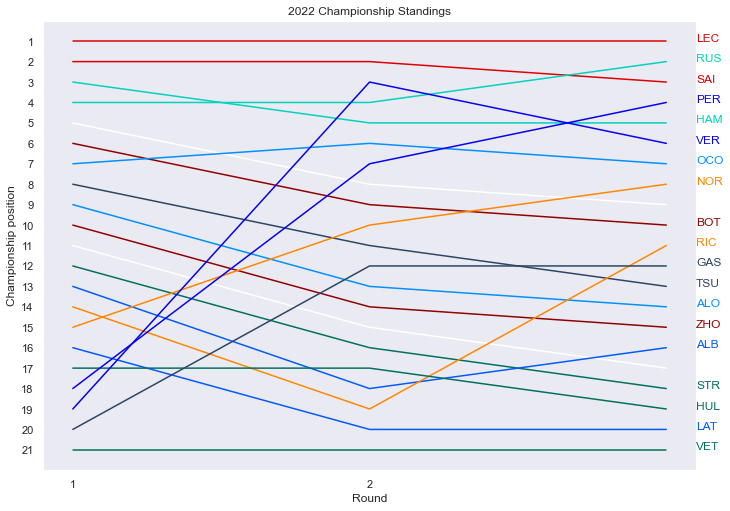

In [70]:
all_championship_standings = all_championship_standings.set_index('round')
all_championship_standings_melted = pd.melt(all_championship_standings.reset_index(), ['round'])
sns.set(rc={'figure.figsize': (11.7, 8.27)})
all_championship_standings_melted['value'] = all_championship_standings_melted['value'].fillna(21.0)
print(all_championship_standings_melted)

fig, ax = plt.subplots()

ax.set_title("2022 Championship Standings")


for driver in pd.unique(all_championship_standings_melted['variable']):
    sns.lineplot(
        x='round',
        y='value',
        data=all_championship_standings_melted.loc[all_championship_standings_melted['variable'] == driver],
        color=ff1.plotting.team_color(driver_team_mapping[driver])
    )

ax.invert_yaxis()

ax.set_xticks(range(1, rounds))
ax.set_yticks(range(1, 22))

ax.set_xlabel("Round")
ax.set_ylabel("Championship position")

ax.grid(False)

for line, name in zip(ax.lines, all_championship_standings.columns.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]

    text = ax.annotate(
        name,
        xy=(x + 0.1, y),
        xytext=(0, 0),
        color=line.get_color(),
        xycoords=(
            ax.get_xaxis_transform(),
            ax.get_yaxis_transform()
        ),
        textcoords="offset points"
    )

plt.show()


### Porównanie kwalifikacji zespołowych kolegów

In [71]:
import pandas as pd
import requests

import fastf1 as ff1

import seaborn as sns
import matplotlib.pyplot as plt


In [72]:
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()

    return response['MRData']


all_quali_results = pd.DataFrame()

team_drivers = {}

current_round = 1

In [73]:
while True:
    race = ergast_retrieve(f'2022/{current_round}/qualifying')

    if not race['RaceTable']['Races']:
        break

    results = race['RaceTable']['Races'][0]['QualifyingResults']

    quali_results = {'round': current_round}

    for j in range(len(results)):
        driver = results[j]['Driver']['code']
        position = int(results[j]['position'])
        team = results[j]['Constructor']['name']



        if not team in team_drivers:
            team_drivers[team] = [driver]
        else:
            if not driver in team_drivers[team]:
                team_drivers[team].append(driver)

        quali_results[driver] = position

    all_quali_results = all_quali_results.append(quali_results, ignore_index=True)

    current_round += 1

   driver            team  quali_score
0     LEC         Ferrari            3
1     VER        Red Bull            2
2     PER        Red Bull            1
3     HAM        Mercedes            2
4     RUS        Mercedes            1
5     BOT      Alfa Romeo            3
6     MAG    Haas F1 Team            2
7     MSC    Haas F1 Team            1
8     OCO  Alpine F1 Team            2
9     ALO  Alpine F1 Team            1
10    GAS      AlphaTauri            3
11    NOR         McLaren            3
12    ALB        Williams            3


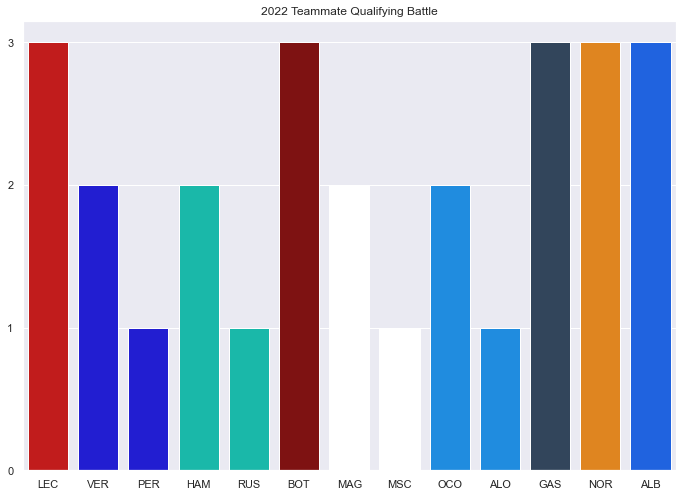

In [74]:
all_quali_battle_results = []
team_colors_palette = []

for team in team_drivers:
    drivers = team_drivers[team]

    quali_results = all_quali_results[drivers]

    fastest_driver_per_round = quali_results.dropna().idxmin(axis=1)

    quali_battle_result = fastest_driver_per_round.value_counts().reset_index()

    for _, driver in quali_battle_result.iterrows():
        all_quali_battle_results.append({
            'driver': driver['index'],
            'team': team,
            'quali_score': driver[0]
        })

    team_colors_palette.append(ff1.plotting.team_color(team))
    team_colors_palette = ['#D3D3D3' if v is None else v for v in team_colors_palette]

all_quali_battle_results = pd.DataFrame.from_dict(all_quali_battle_results)
print(all_quali_battle_results)
# Increase the size of the plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

custom_palette = sns.set_palette(sns.color_palette(team_colors_palette))

fig, ax = plt.subplots()

ax.set_title(f"2022 Teammate Qualifying Battle")

g = sns.barplot(
    x='driver',
    y='quali_score',
    hue='team',
    data=all_quali_battle_results,
    dodge=False,
    palette=custom_palette,
)

plt.yticks(range(max(all_quali_battle_results['quali_score']) + 1))

plt.legend([],[], frameon=False)

g.set(xlabel=None)
g.set(ylabel=None)

plt.show()

### Porówanie czasów okrążeń

In [75]:
import fastf1 as ff1

import pandas as pd

from matplotlib import pyplot as plt


import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [76]:
pd.options.mode.chained_assignment = None
race = ff1.get_session(2022, 'Saudi Arabia', 'R')
laps = race.load_laps()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.2.2]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
core        WARNING 	No lap data for driver 22
api            INFO 	Fetching track status data...
api            INFO 	Fetching weather data...
core           INFO 	Finished loading data for 19 drivers: ['1', '16', '55', '11', '63', '31', '4', '10', '20', '44', '24', '27', '18', '23', '77', '14', '3', '6', '22']


[1     95.275
2     94.890
3     94.700
4     94.809
5     94.840
6     94.634
7     94.821
8     94.832
9     95.252
10    94.959
11    95.191
12    94.982
13    95.093
14    95.370
20    95.227
21    94.167
22    93.688
23    93.445
24    93.301
25    93.304
26    93.059
27    93.030
28    92.930
29    92.778
30    92.897
31    92.887
32    92.855
33    92.827
34    92.474
35    92.543
36    93.124
40    94.945
41    92.755
42    94.644
43    92.302
44    92.063
45    92.737
46    91.779
47    91.861
48    92.079
49    91.772
dtype: float64, 51    94.943
52    94.794
53    94.651
54    95.156
55    94.585
56    94.702
57    94.569
58    94.967
59    94.679
60    94.781
61    94.915
62    94.777
63    95.214
64    95.237
70    94.636
71    94.075
72    93.459
73    93.521
74    93.324
75    93.182
76    93.184
77    92.711
78    92.942
79    92.752
80    93.079
81    92.683
82    92.878
83    92.680
84    92.481
85    92.640
86    93.102
90    96.117
91    93.281
92    93.818
93    92

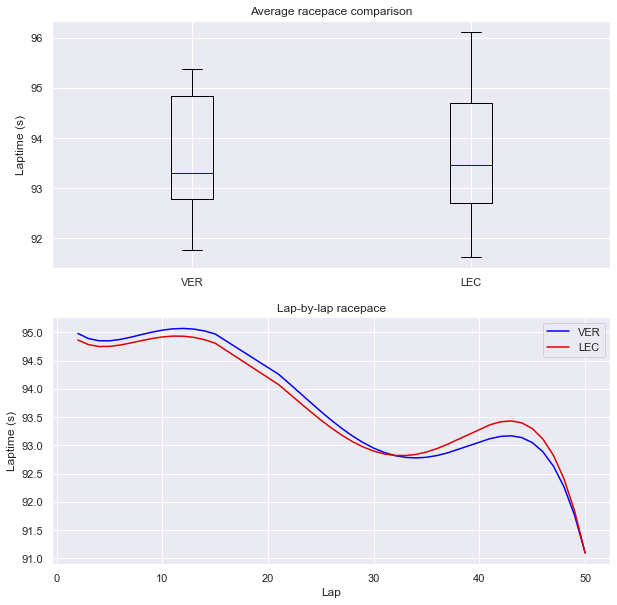

In [77]:

laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
# To get accurate laps only, we exclude in- and outlaps
laps = laps.loc[(laps['PitOutTime'].isnull() & laps['PitInTime'].isnull())]
# using the Inter-Quartile Range (IQR) proximity rule
q75, q25 = laps['LapTimeSeconds'].quantile(0.75), laps['LapTimeSeconds'].quantile(0.25)

intr_qr = q75 - q25

laptime_max = q75 + (1.5 * intr_qr) # IQR proximity rule: Max = q75 + 1,5 * IQR
laptime_min = q25 - (1.5 * intr_qr) # IQR proximity rule: Min = q25 + 1,5 * IQR

laps.loc[laps['LapTimeSeconds'] < laptime_min, 'LapTimeSeconds'] = np.nan
laps.loc[laps['LapTimeSeconds'] > laptime_max, 'LapTimeSeconds'] = np.nan
drivers_to_visualize = ['VER', 'LEC']
# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [10, 10]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots(2)


laptimes = [laps.pick_driver(x)['LapTimeSeconds'].dropna() for x in drivers_to_visualize]

ax[0].boxplot(laptimes, labels=drivers_to_visualize)

ax[0].set_title('Average racepace comparison')
ax[0].set(ylabel='Laptime (s)')
for driver in drivers_to_visualize:
    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]

    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()

    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]

    # X-coordinate is the lap number
    x = driver_laps['LapNumber']

    # Y-coordinate a smoothed line between all the laptimes
    poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
    y_poly = np.poly1d(poly)(driver_laps['LapNumber'])

    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'

    # Plot the data
    ax[1].plot(x, y_poly, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle)

    # Include scatterplot (individual laptimes)
    # y = driver_laps['LapTimeSeconds']
    # scatter_marker = 'o' if team not in visualized_teams else '^'
    # ax[1].scatter(x, y, label=driver, color=ff1.plotting.team_color(team), marker=scatter_marker)

    # Append labels
    ax[1].set(ylabel='Laptime (s)')
    ax[1].set(xlabel='Lap')

    # Set title
    ax[1].set_title('Lap-by-lap racepace')

    # Generate legend
    ax[1].legend()

    # Add the team to the visualized teams variable so that the next time the linestyle will be different
    visualized_teams.append(team)
print(laptimes)
plt.show()

### Zmiana biegów w mini sektorach

In [78]:

import fastf1

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np

session = fastf1.get_session(2022, 'Bahrain', 'Q')
session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()


core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.2.2]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '55', '11', '44', '77', '20', '14', '63', '10', '31', '47', '4', '23', '24', '22', '27', '3', '18', '6']


In [79]:
##############################################################################
# Prepare the data for plotting by converting it to the appropriate numpy
# data types

x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)
# sphinx_gallery_defer_figures

In [80]:
##############################################################################
# Create a line collection. Set a segmented colormap and normalize the plot
# to full integer values of the colormap

cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N + 1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)
# sphinx_gallery_defer_figures


C:\Users\przem\AppData\Local\Temp\ipykernel_4316\203174216.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))


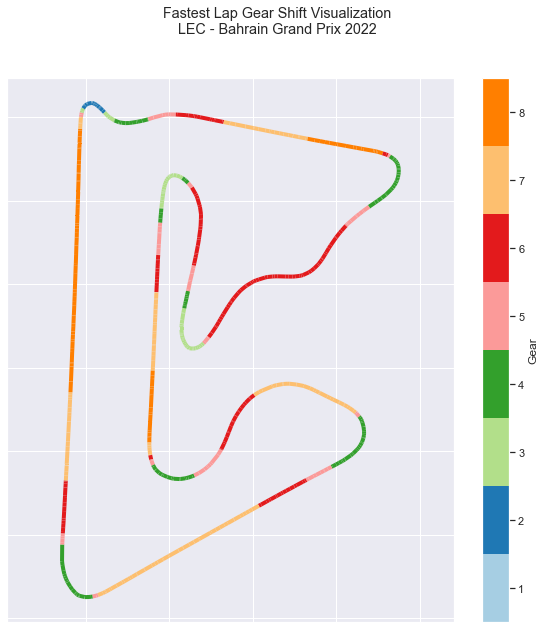

In [81]:

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)

cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))
plt.show()